## Routes


- `Route ID`: Unique route identifier, according to ICAO Annex 11 basic designators for ATS routes.
  - The basic designator consists of one letter of the alphabet followed by a number from 1 to 999. The letters may be:
    - A, B, G, R — for routes which form part of the regional networks of ATS routes and are not area navigation routes
    - L, M, N, P — for area navigation routes which form part of the regional networks of ATS routes
    - H, J, V, W — for routes which do not form part of the regional networks of ATS routes and are not area navigation routes
    - Q, T, Y, Z — for area navigation routes which do not form part of the regional networks of ATS routes
  - Where applicable, one supplementary letter shall be added as a prefix to the basic designator as follows:
    - K — to indicate a low level route established for use primarily by helicopters
    - U — to indicate that the route or portion thereof is established in the upper airspace
    - S — to indicate a route established exclusively for use by supersonic aircraft during acceleration/deceleration and while in supersonic flight
  - Where applicable, a supplementary letter may be added after the basic designator of the ATS route as a suffix as follows:
    - F — to indicate that on the route or portion thereof advisory service only is provided
    - G — to indicate that on the route or portion thereof flight information service only is provided
    - Y — for RNP1 routes at and above FL200 to indicate that all turns on the route between 30 and 90 degrees shall be made within the tolerance of a tangential arc between the straight leg segments defined with a radius of 22.5 NM
    - Z — for RNP1 routes at and below FL190 to indicate that all turns on the route between 30 and 90 degrees shall be made within the tolerance of a tangential arc between the straight leg segments defined with a radius of 15 NM
- `Sequence Number`: Numeric sequence number of a point on the route
- `Latitude`: Latitude in decimal degrees of a point on the route
- `Longitude`: Longitude in decimal degrees of a point on the route

In [1]:
import numpy as np
import pandas as pd
routesfile_path = './Eurocontrol_data/202112/Route_2112.csv'
routes = pd.read_csv(routesfile_path)
# print numbe of unique Route ID
print(f'Number of unique Route ID: {routes["Route ID"].nunique()}')
# print the shape of the dataframe
print(f'Shape of the dataframe: {routes.shape}')
routes.iloc[20:30]


Number of unique Route ID: 27907
Shape of the dataframe: (155733, 4)


,Route ID,Sequence Number,Latitude,Longitude
20,A1,21,32.11694,28.41000
21,A1,22,31.49417,29.44861
22,A1,23,31.18778,29.95083
23,A1,24,31.09194,30.30167
24,A1,25,30.09222,31.38833
25,A10,1,52.18528,-128.11361
26,A10,2,53.76667,-129.84611
27,A10,3,54.26333,-130.42389
28,A10,4,35.06833,26.18917
29,A10,5,33.95167,27.33333


### Routes Visualization

/tmp/ipykernel_443438/2973673682.py:20: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


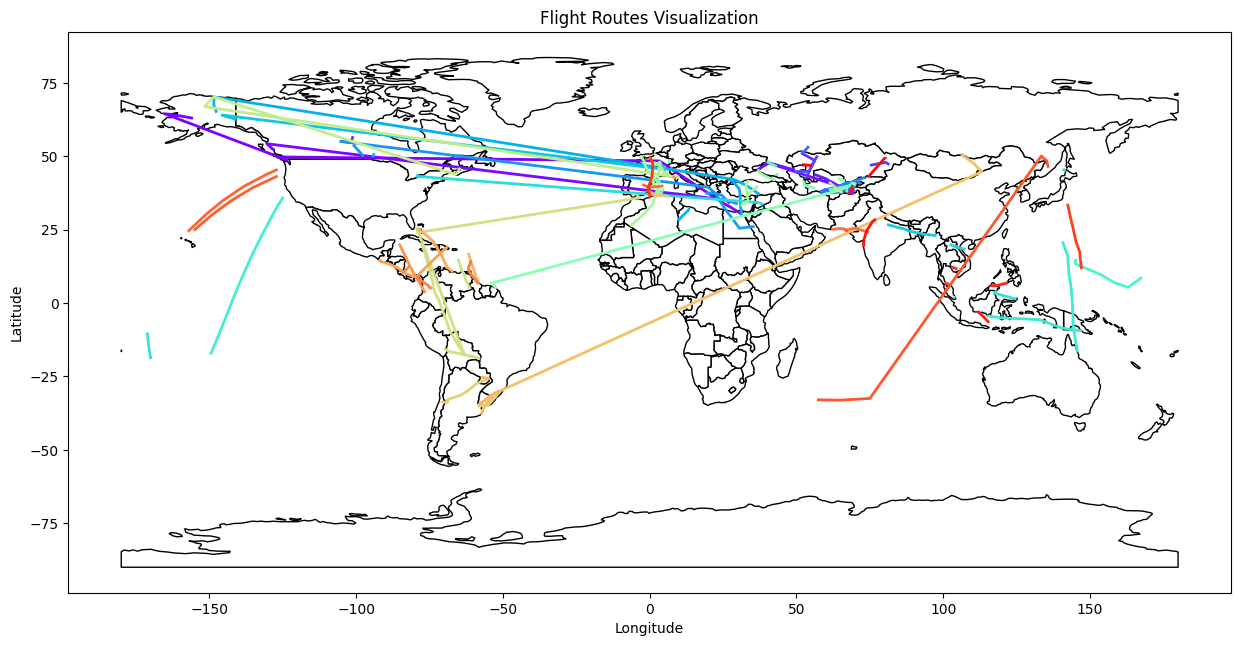

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, LineString
import numpy as np

# selecting a sample of routes
unique_routes = routes['Route ID'].unique()
# sample_routes = np.random.choice(unique_routes, 100, replace=False)
sample_routes = unique_routes[:100]
sample_routes_df = routes[routes['Route ID'].isin(sample_routes)]

# Converting DataFrame to GeoDataFrame
gdf = gpd.GeoDataFrame(sample_routes_df, geometry=gpd.points_from_xy(sample_routes_df.Longitude, sample_routes_df.Latitude))

# Grouping by 'Route ID' and creating LineStrings for each route
route_lines = gdf.groupby('Route ID')['geometry'].apply(lambda x: LineString(x.tolist()) if x.size > 1 else x.tolist()[0])
routes_gdf = gpd.GeoDataFrame(route_lines, geometry='geometry')

# Creating a base map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
base_map = world.plot(figsize=(15, 10), color='white', edgecolor='black')

# Plotting routes on the base map
colors = plt.cm.rainbow(np.linspace(0, 1, len(routes_gdf)))
for color, (route_id, route) in zip(colors, routes_gdf.iterrows()):
    gpd.GeoSeries(route).plot(ax=base_map, color=color, linewidth=2)

plt.title('Flight Routes Visualization')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()

In [3]:
import folium
from folium.plugins import MarkerCluster

# Function to create a basic map
def create_map():
    return folium.Map(location=[routes['Latitude'].mean(), routes['Longitude'].mean()], zoom_start=2)

# Function to add routes to the map
def add_routes_to_map(map_obj, data):
    marker_cluster = MarkerCluster().add_to(map_obj)
    for _, row in data.iterrows():
        folium.Marker(location=[row['Latitude'], row['Longitude']], popup=f"Route ID: {row['Route ID']}\nSequence: {row['Sequence Number']}").add_to(marker_cluster)

# Creating the map
routes_map = create_map()
add_routes_to_map(routes_map, routes)

# Saving the map to an HTML file
map_file = 'flight_routes_map.html'
routes_map.save(map_file)

map_file


'flight_routes_map.html'